In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
# DATA PREPROCESSING

In [7]:
# Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
# Creating a data structure with 60 timesteps and 1 output

In [12]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [14]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [15]:
# Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1198, 60, 1)

In [18]:
# BUILDING THE RNN

In [19]:
# Importing the Keras libraries and packages

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
# Initializing the RNN

In [23]:
regressor = Sequential()

In [24]:
# Adding the first LSTM layer and some Dropout regularization

In [25]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [26]:
# Adding the second LSTM layer and some Dropout regularization

In [27]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [28]:
# Adding the third LSTM layer and some Dropout regularization

In [29]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [30]:
# Adding the fourth LSTM layer and some Dropout regularization

In [31]:
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(0.2))

In [32]:
# Adding the output layer

In [33]:
regressor.add(Dense(units = 1))

In [34]:
# Compiling the RNN

In [35]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [36]:
# Fitting the RNN to the training set

In [37]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0463
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0076
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0061
Epoch 5/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0064
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0048
Epoch 12/100
1198/1198 [==============================] - 10s 8ms/step 

1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017
Epoch 96/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0015


In [38]:
# MAKING THE PREDICTIONS AND VISUALISING THE RESULTS

In [39]:
# Getting the real stock price of 2017

In [40]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [41]:
# Getting the predicted stock price of 2017

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [43]:
predicted_stock_price

array([[771.6623 ],
       [768.96094],
       [769.2824 ],
       [770.47595],
       [773.6143 ],
       [779.25385],
       [784.2416 ],
       [786.12683],
       [786.4855 ],
       [786.371  ],
       [786.218  ],
       [785.9945 ],
       [785.8434 ],
       [786.41394],
       [787.35785],
       [792.0087 ],
       [798.654  ],
       [805.6465 ],
       [809.16113],
       [804.70886]], dtype=float32)

In [44]:
# Visualising the results

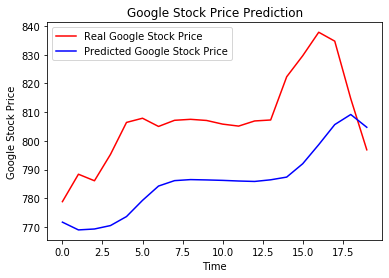

In [45]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

In [46]:
# RMSE

In [47]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [48]:
rmse

24.178495127180398

In [49]:
# TUNING THE RNN

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier

In [51]:
from sklearn.model_selection import GridSearchCV

In [68]:
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(LSTM(units=50, return_sequences=False))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer=optimizer, loss='mean_squared_error')
    return regressor

In [69]:
regressor = KerasClassifier(build_fn = build_classifier)

In [70]:
parameters = {'batch_size': [25, 32],
              'epochs': [10, 25],
              'optimizer': ['adam', 'rmsprop']}

In [71]:
grid_search = GridSearchCV(estimator=regressor, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/10
1078/1078 [==============================] - 15s 14ms/step - loss: 356683.9632
Epoch 2/10
1078/1078 [==============================] - 7s 6ms/step - loss: 350859.4655
Epoch 3/10
1078/1078 [==============================] - 7s 6ms/step - loss: 348116.5052
Epoch 4/10
1078/1078 [==============================] - 7s 6ms/step - loss: 345645.7445
Epoch 5/10
1078/1078 [==============================] - 7s 7ms/step - loss: 343273.7473
Epoch 6/10
1078/1078 [==============================] - 7s 6ms/step - loss: 340962.7109
Epoch 7/10
1078/1078 [==============================] - 7s 6ms/step - loss: 338716.0634
Epoch 8/10
1078/1078 [==============================] - 7s 7ms/step - loss: 336478.7629
Epoch 9/10
1078/1078 [==============================] - 7s 6ms/step - loss: 334289.4994
Epoch 10/10
1078/1078 [==============================] - 7s 7ms/step - loss: 332094.4540
Epoch 1/10
1078/1078 [==============================] - 13s 12ms/step - loss: 359373.9581
Epoch 2/10
1078/1078 [=====

In [ ]:
# Grid Search for RNN took long time to show results in my laptop, that's why you can run it on your computer if you want to the results